In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 学習用データの読み込み
df = np.loadtxt('../files/images2.csv', delimiter=',', skiprows=1)

In [5]:
# 訓練データとテストデータの分離
train_x = df[:, 0:2]
train_y = df[:, 2]

# ロジスティック回帰の実装

In [10]:
# パラメタの初期化
theta = np.random.rand(3)

In [11]:
# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

In [14]:
train_z = standardize(train_x)

In [13]:
# x0を加える
def to_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    return np.hstack([x0, x])

In [15]:
X = to_matrix(train_z)

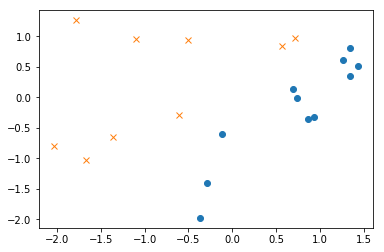

In [17]:
# データをプロットする
# train_x[train_y == 1, 0]はラベルが「1」の変数0番目の値。train_x[train_y == 1, 1]は変数1番目の値
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.show()

### シグモイド関数

$ f\theta(x) = \frac{1}{1 + exp(-\theta^\mathrm{T}x)}  $


In [18]:
def f(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

### パラメタ更新式

$ \displaystyle \theta_j := \theta_j - \eta \sum_{i=1}^n(f_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j $

In [19]:
# 学習率
ETA = 1e-3

In [20]:
# 繰り返し回数
epoch = 5000

In [23]:
# 更新回数
count = 0

In [24]:
# 重みを学習
for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    
    # ログ出力
    count += 1
    print('{}回目: theta = {}'.format(count, theta))

1回目: theta = [0.9796981  0.04981138 0.83729085]
2回目: theta = [0.97657892 0.0562955  0.8324495 ]
3回目: theta = [0.9734696  0.06275557 0.82761045]
4回目: theta = [0.97037019 0.06919161 0.8227738 ]
5回目: theta = [0.96728072 0.07560363 0.81793965]
6回目: theta = [0.96420125 0.08199165 0.81310812]
7回目: theta = [0.9611318  0.08835569 0.80827931]
8回目: theta = [0.95807241 0.09469576 0.80345333]
9回目: theta = [0.95502312 0.10101189 0.79863029]
10回目: theta = [0.95198397 0.10730409 0.7938103 ]
11回目: theta = [0.94895499 0.11357238 0.78899345]
12回目: theta = [0.94593621 0.11981678 0.78417987]
13回目: theta = [0.94292766 0.12603732 0.77936966]
14回目: theta = [0.93992939 0.13223401 0.77456292]
15回目: theta = [0.93694142 0.13840688 0.76975976]
16回目: theta = [0.93396379 0.14455595 0.76496029]
17回目: theta = [0.93099652 0.15068124 0.76016462]
18回目: theta = [0.92803964 0.15678278 0.75537285]
19回目: theta = [0.92509319 0.1628606  0.75058508]
20回目: theta = [0.92215719 0.16891472 0.74580142]
21回目: theta = [0.91923166 0.1

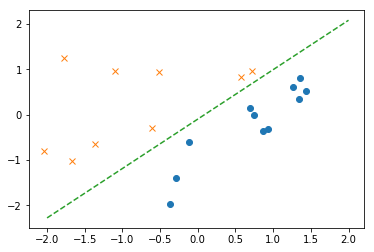

In [25]:
# 結果をプロット

x0 = np.linspace(-2, 2, 100)

plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.plot(x0, -(theta[0] + theta[1] * x0) / theta[2], linestyle='dashed')
plt.show()

In [29]:
# 検証
f(to_matrix(standardize([[200, 100]])))

array([0.89390918])

- 横長である確率が89%であることを示している